In [1]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
model = torch.hub.load('/Users/aliyajanmohamed/Downloads/Ironhack/FinalProject/yolov5', 'custom', 
                       path='/Users/aliyajanmohamed/Downloads/Ironhack/FinalProject/yolov5/runs/train/exp18/weights/best.pt',
                       force_reload=True,source='local')

YOLOv5 ðŸš€ v7.0-175-g5f11555 Python-3.11.3 torch-2.0.1 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img="https://cdn.24.co.za/files/Cms/General/d/11611/dca2f657ec514001a425ffa364fc11f6.jpg"

In [5]:
results = model(img)
results.print()

image 1/1: 683x1024 1 elephants
Speed: 1950.8ms pre-process, 406.9ms inference, 39.4ms NMS per image at shape (1, 3, 448, 640)


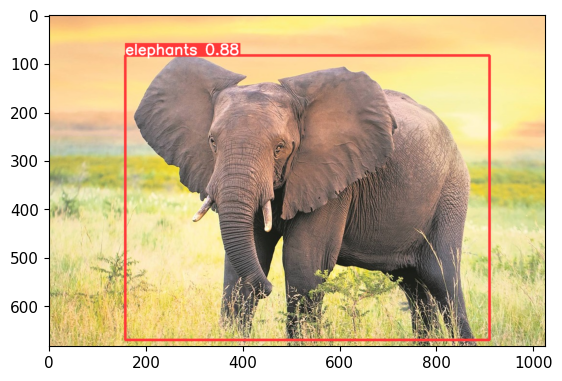

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
img = "https://pulitzercenter.org/sites/default/files/styles/1340x815_scale/public/09-07-17/dscf7233.jpg.webp?itok=arxwLQr0"

In [8]:
results = model(img)
results.print()

image 1/1: 815x1087 3 poacherss
Speed: 533.6ms pre-process, 384.2ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)


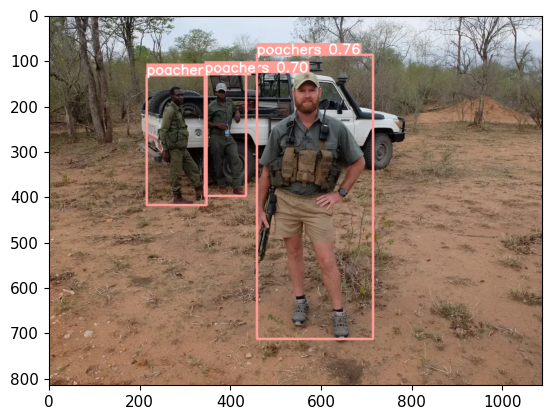

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.names

{0: 'elephants', 1: 'poachers'}

In [11]:
import os
import pickle
import google_auth_oauthlib.flow
import googleapiclient.discovery
from google.auth.transport.requests import Request

In [16]:
service = googleapiclient.discovery.build('gmail', 'v1', credentials=creds)

In [4]:
import cv2
import ssl
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import smtplib


target_class = 'poachers'
email_subject = 'POACHER DETECTED!'
email_body = 'A poacher has been detected, send in your team NOW!'


vid = #file path

sender_email = #email address
receiver_email = #email address

smtp_server = 'smtp.gmail.com'
smtp_port = 587
smtp_username = #email address/username
smtp_password = #password

cap = cv2.VideoCapture(vid)

context = ssl.create_default_context()

email_sent = False

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame is None:
        continue

    results = model(frame)
    cv2.imshow('Poacher Detector', np.squeeze(results.render()))

    pred_boxes = results.pandas().xyxy[0]
    detected_classes = pred_boxes['name'].tolist()
    
    if target_class in detected_classes:
        
        message = MIMEMultipart()
        message['From'] = sender_email
        message['To'] = receiver_email
        message['Subject'] = email_subject
        message.attach(MIMEText(email_body, 'plain'))

        if email_sent == False:
            with smtplib.SMTP(smtp_server, smtp_port) as server:
                server.starttls(context=context)
                server.login(smtp_username, smtp_password)
                server.sendmail(sender_email, receiver_email, message.as_string())
            email_sent = True

    cv2.imshow('Poacher Detector', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()